# Эффект Поккельса

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
from scipy.stats import linregress
import pint

u = pint.UnitRegistry()

### Эксперимент 1 - радиусы колец

In [6]:
L = 70 * u.cm
r = np.array([1.25, 1.75, 2.5, 3, 3.5])
m = np.arange(len(r)) + 1

In [10]:
MNK = linregress(m, r)
xAx = np.linspace(0, max(m) + 0.1)

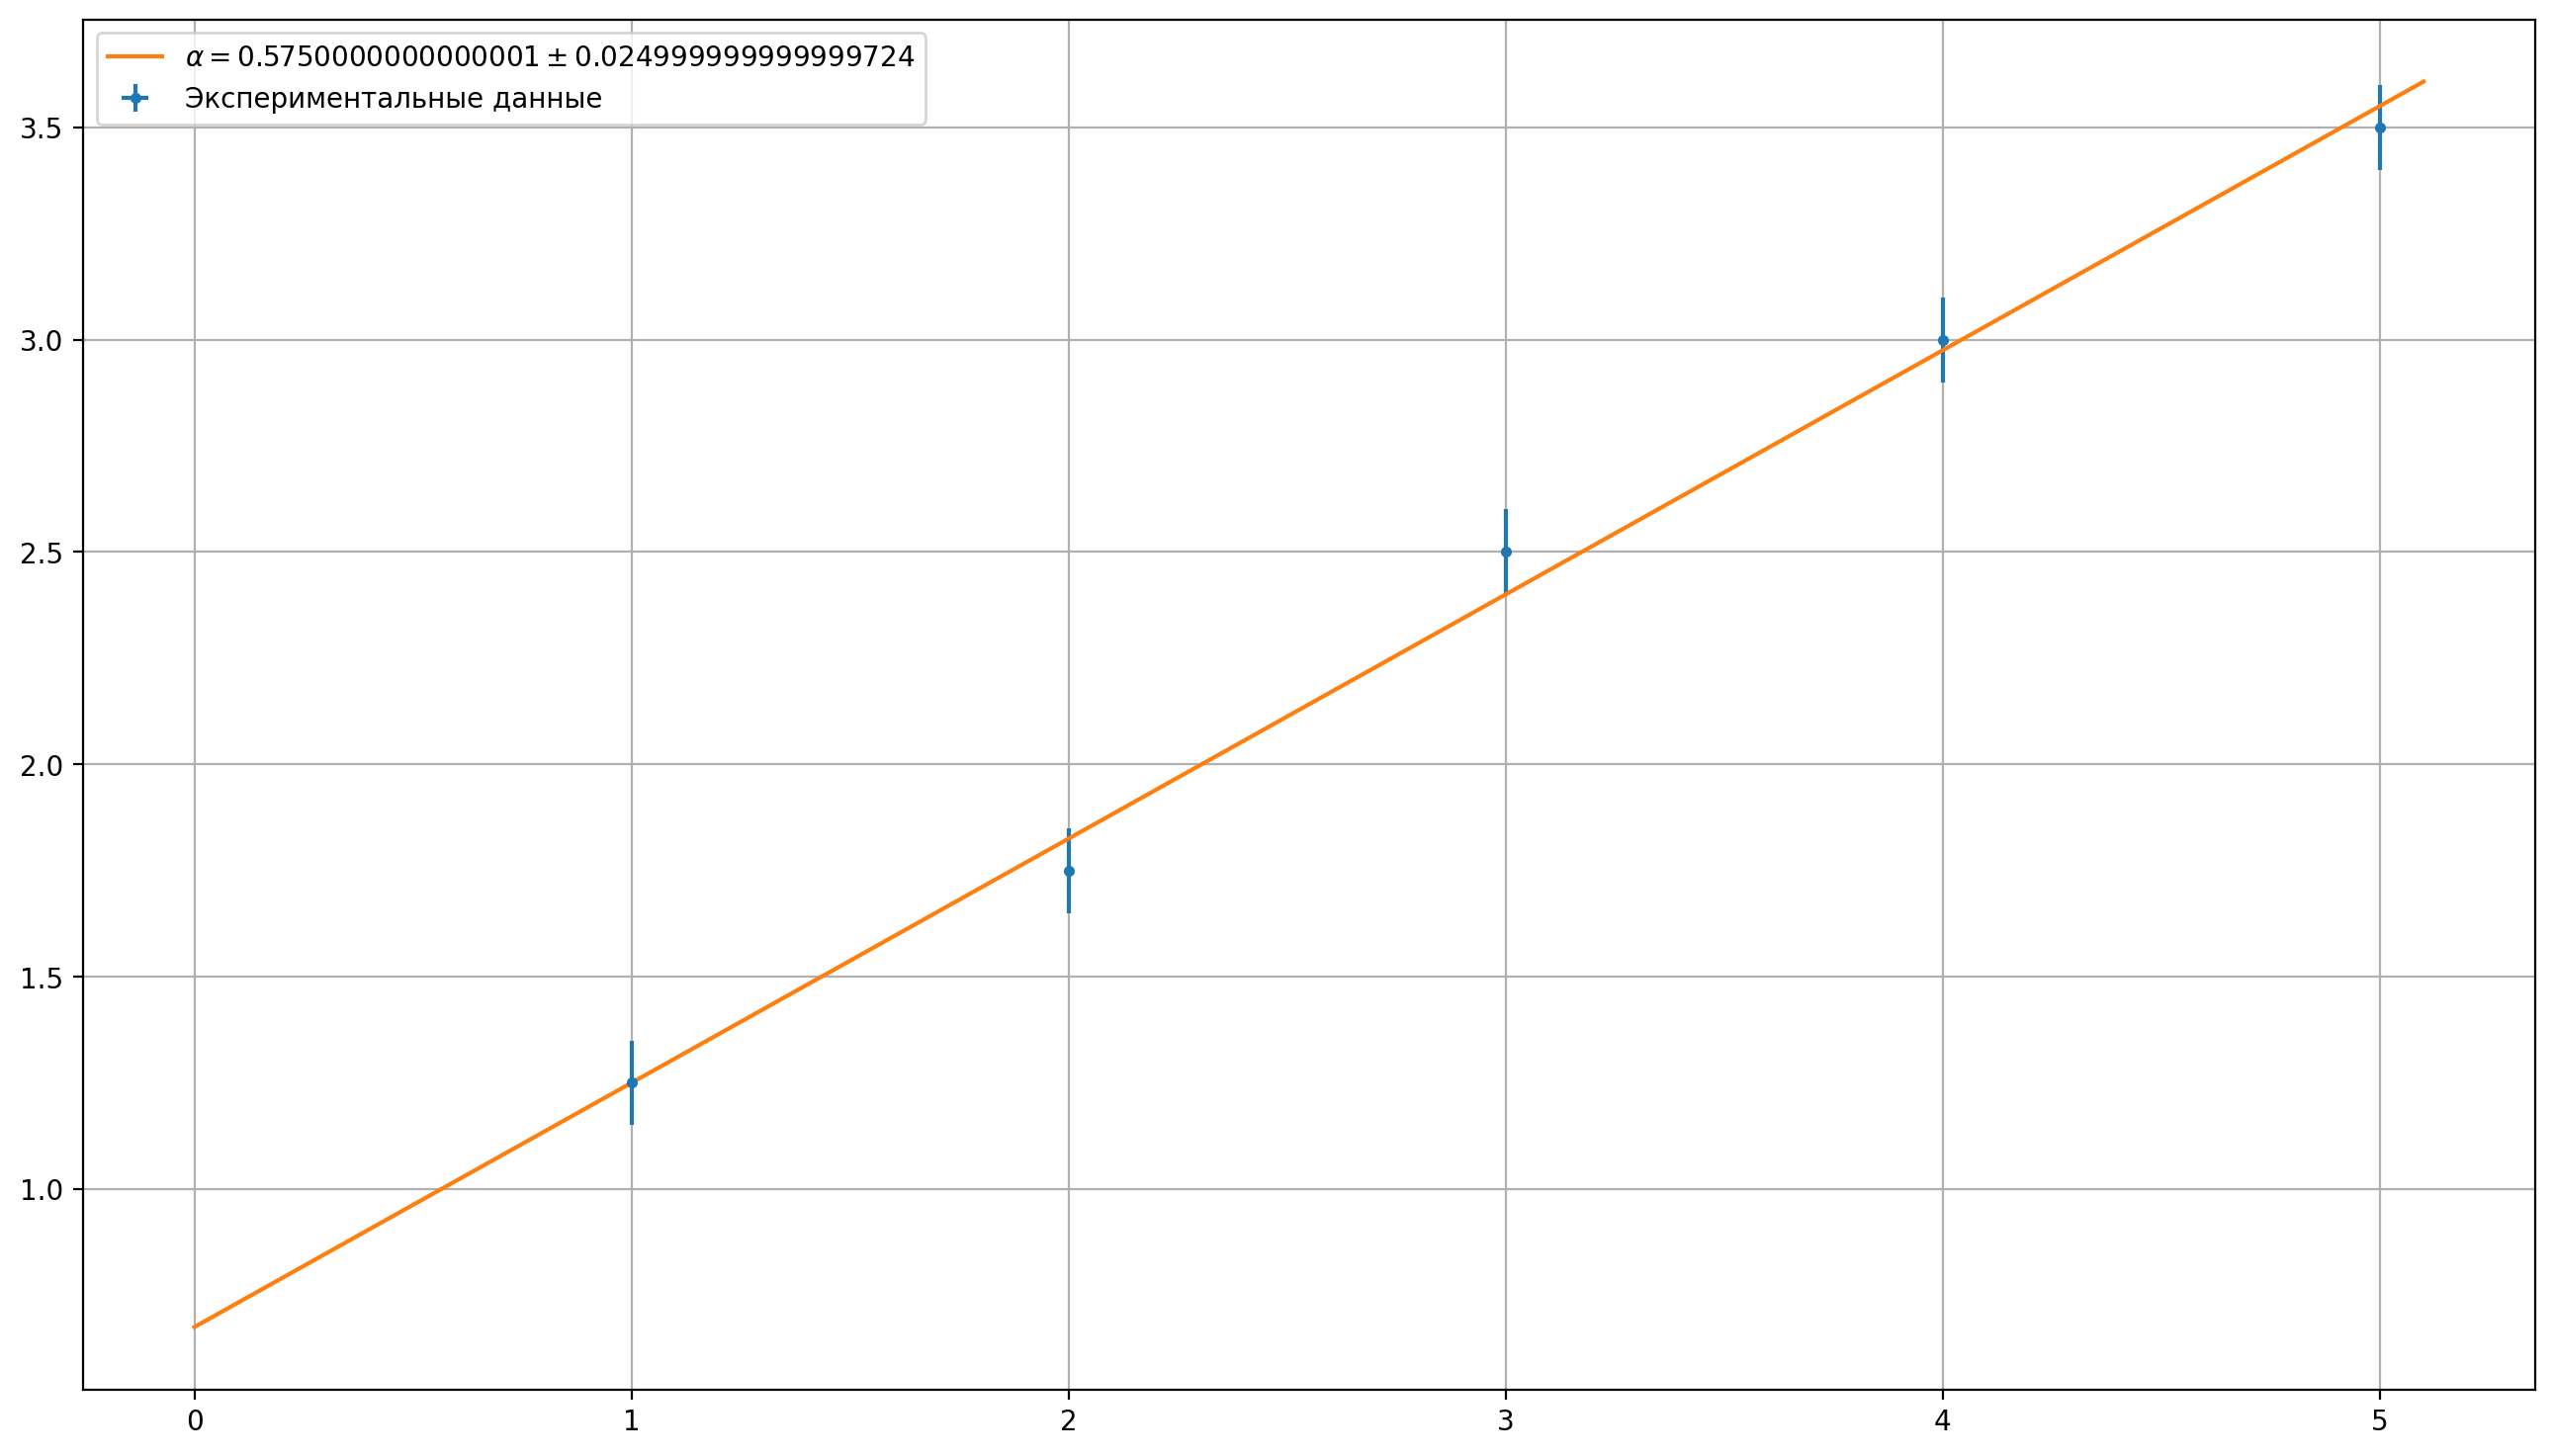

In [12]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)

plt.errorbar(m, r, 
             xerr = [0 for _ in m], 
             yerr = [0.1 for _ in r], 
             fmt = '.', label = "Экспериментальные данные")
plt.plot(xAx, MNK.slope * xAx + MNK.intercept, label = r"$\alpha = {} \pm {}$".format(round(MNK.slope, 2),
                                                                                      round() MNK.stderr))
plt.grid()
plt.legend();